In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout,Flatten,Activation
from tensorflow.keras import activations

## Read in data

In [2]:
btc_path = os.path.abspath("result_BTC.csv")
eth_path = os.path.abspath("result_ETH.csv")
bnb_path = os.path.abspath("result_BNB.csv")
btc_data=pd.read_csv(btc_path)
eth_data=pd.read_csv(eth_path)
bnb_data=pd.read_csv(bnb_path)

## Process BTC data

In [7]:
data = btc_data['close']
close_train=data.iloc[:len(data)-260]          
close_test=data.iloc[len(close_train):]     
close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)  

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))               
close_scaled=scaler.fit_transform(close_train)    

timestep=24
x_train=[]
y_train=[]
for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) 
print("x_train shape= ",x_train.shape)                       
print("y_train shape= ",y_train.shape)  

x_train shape=  (25957, 24, 1)
y_train shape=  (25957,)


## GRU model for BTC

In [8]:
model=Sequential()
model.add(GRU(200,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()
model.fit(x_train,y_train,epochs=30,batch_size=32,validation_split=0.1,shuffle=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 200)               121800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 122,001
Trainable params: 122,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
731/731 [==============================] - 33s 44ms/step - loss: 2.7730e-04 - val_loss: 0.0088
Epoch 2/30
731/731 [==============================] - 31s 43ms/step - loss: 3.1456e-06 - val_loss: 0.0123
Epoch 3/30
731/731 [==============================] - 31s 43ms/step - loss: 2.6659e-06 - val_loss: 0.0117
Epoch 4/30
731/731 [==============================] - 31s 42ms/step - loss: 2.9185e-06 - val_loss: 0.0109
Epoch 5/30
731/731 [==============================] - 33s 45ms/step - loss: 2.7383e-06 -

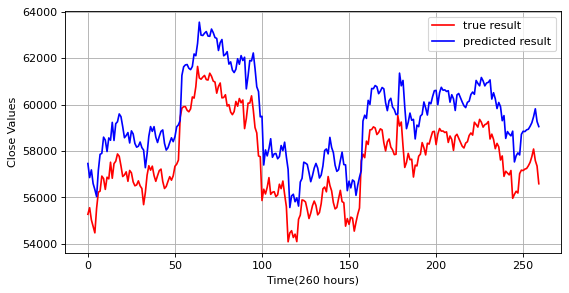

In [9]:
inputs=data[len(data)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
predicted_data=model.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(260 hours)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()

In [10]:
test_series = pd.Series(data_test.flatten().tolist())
predicted_series = pd.Series(predicted_data.flatten().tolist())
print(test_series.corr(predicted_series))

0.963272393452321


## Process ETH data

In [3]:
data = eth_data['close']
close_train=data.iloc[:len(data)-260]          
close_test=data.iloc[len(close_train):]     
close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)  
 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))               
close_scaled=scaler.fit_transform(close_train)         
close_scaled.shape

timestep=24
x_train=[]
y_train=[]
for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) 
print("x_train shape= ",x_train.shape)                       
print("y_train shape= ",y_train.shape)     

x_train shape=  (25957, 24, 1)
y_train shape=  (25957,)


## GRU model for ETH

In [4]:
model=Sequential()
model.add(GRU(200,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()
model.fit(x_train,y_train,epochs=30,batch_size=32,validation_split=0.1,shuffle=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 200)               121800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 122,001
Trainable params: 122,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
731/731 [==============================] - 35s 45ms/step - loss: 6.7910e-04 - val_loss: 0.0033
Epoch 2/30
731/731 [==============================] - 32s 44ms/step - loss: 5.6500e-06 - val_loss: 0.0073
Epoch 3/30
731/731 [==============================] - 32s 44ms/step - loss: 5.4832e-06 - val_loss: 0.0075
Epoch 4/30
731/731 [==============================] - 32s 44ms/step - loss: 4.9339e-06 - val_loss: 0.0076
Epoch 5/30
731/731 [==============================] - 32s 44ms/step - loss: 4.9981e-06 -

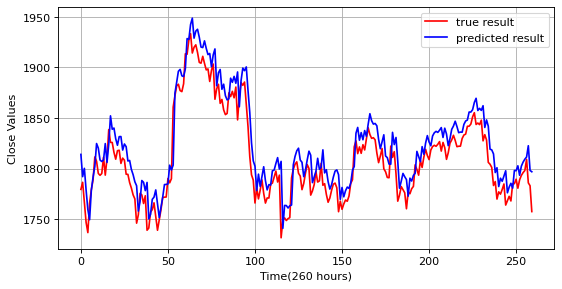

In [5]:
inputs=data[len(data)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
predicted_data=model.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(260 hours)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()

In [6]:
test_series = pd.Series(data_test.flatten().tolist())
predicted_series = pd.Series(predicted_data.flatten().tolist())
print(test_series.corr(predicted_series))

0.9511582115890784


## Process BNB Data

In [8]:
data = bnb_data['close']
close_train=data.iloc[:len(data)-260]          
close_test=data.iloc[len(close_train):]     
close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)  
close_train.shape   

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))               
close_scaled=scaler.fit_transform(close_train)         
close_scaled.shape

timestep=24
x_train=[]
y_train=[]
for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) 
print("x_train shape= ",x_train.shape)                       
print("y_train shape= ",y_train.shape)                     

x_train shape=  (25957, 24, 1)
y_train shape=  (25957,)


## GRU model for BNB

In [9]:
model=Sequential()
model.add(GRU(200,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()
model.fit(x_train,y_train,epochs=40,batch_size=32,validation_split=0.1,shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 200)               121800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 122,001
Trainable params: 122,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
731/731 [==============================] - 34s 45ms/step - loss: 7.3727e-05 - val_loss: 0.0304
Epoch 2/40
731/731 [==============================] - 32s 44ms/step - loss: 1.0744e-06 - val_loss: 0.0300
Epoch 3/40
731/731 [==============================] - 32s 43ms/step - loss: 9.7454e-07 - val_loss: 0.0292
Epoch 4/40
731/731 [==============================] - 32s 43ms/step - loss: 8.3482e-07 - val_loss: 0.0275
Epoch 5/40
731/731 [==============================] - 32s 43ms/step - loss: 7.4768e-07

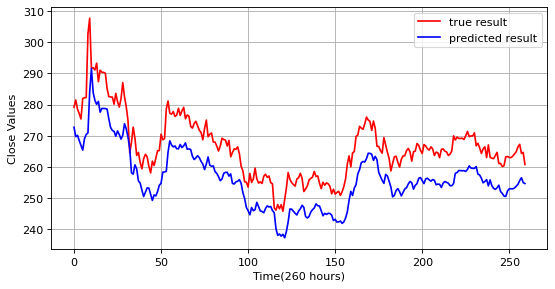

In [10]:
inputs=data[len(data)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
predicted_data=model.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(260 hours)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()

In [11]:
test_series = pd.Series(data_test.flatten().tolist())
predicted_series = pd.Series(predicted_data.flatten().tolist())
print(test_series.corr(predicted_series))

0.9539255559351286
